In [1]:
# imports
import pandas as pd
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras import layers
from keras import models
from keras import regularizers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow.keras as keras
import PIL.Image as Image
import math

In [2]:
train_data_dir = 'data/short'

# Get all the data in the directory data/short
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=1500)

# Create the datasets
train_images, y_train = next(train_generator)


Found 1500 images belonging to 5 classes.


# Binary labeling

Label the data as belonging to one of 2 classes, healthy or diseased.

In [3]:
# make dataframe and preview
df = pd.DataFrame(y_train)
df

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1495,0.0,0.0,1.0,0.0,0.0
1496,0.0,0.0,1.0,0.0,0.0
1497,0.0,0.0,1.0,0.0,0.0
1498,0.0,0.0,1.0,0.0,0.0


In [4]:
df.loc[df[4]==1,"Healthy"]=1
df.loc[df[4]==0,"Healthy"]=0
df.loc[df[4]==1,"Diseased"]=0
df.loc[df[4]==0,"Diseased"]=1
df

,0,1,2,3,4,Healthy,Diseased
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
1495,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1496,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1497,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1498,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [5]:
df.drop([0, 1, 2, 3, 4], axis=1, inplace=True)

In [6]:
df.tail(5)

,Healthy,Diseased
1495,0.0,1.0
1496,0.0,1.0
1497,0.0,1.0
1498,0.0,1.0
1499,0.0,1.0


In [7]:
# check for any null entries
df.isnull().sum()

Healthy     0
Diseased    0
dtype: int64

In [8]:
df['Healthy'].sum()


300.0

In [9]:
df['Diseased'].sum()


1200.0

In [10]:
cnn_train, cnn_test, cnn_train_labels, cnn_test_labels= train_test_split(train_images, y_train, test_size=0.2, random_state=42,shuffle=True)


In [11]:
np.random.seed(42)
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3))) 
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(5, activation='sigmoid'))

cnn_model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc', 'AUC'])
cnn_results = cnn_model.fit(cnn_train,
                            cnn_train_labels, 
                            epochs=10,
                            batch_size=16,
                            validation_data=(cnn_test, cnn_test_labels))




Epoch 1/10


75/75 [==============================] - 9s 70ms/step - loss: nan - acc: 0.2017 - auc: 0.0033 - val_loss: nan - val_acc: 0.1900 - val_auc: 0.0000e+00
Epoch 2/10
75/75 [==============================] - 5s 65ms/step - loss: nan - acc: 0.2025 - auc: 0.0000e+00 - val_loss: nan - val_acc: 0.1900 - val_auc: 0.0000e+00
Epoch 3/10
75/75 [==============================] - 5s 69ms/step - loss: nan - acc: 0.2025 - auc: 0.0000e+00 - val_loss: nan - val_acc: 0.1900 - val_auc: 0.0000e+00
Epoch 4/10
75/75 [==============================] - 5s 72ms/step - loss: nan - acc: 0.2025 - auc: 0.0000e+00 - val_loss: nan - val_acc: 0.1900 - val_auc: 0.0000e+00
Epoch 5/10
75/75 [==============================] - 5s 62ms/step - loss: nan - acc: 0.2025 - auc: 0.0000e+00 - val_loss: nan - val_acc: 0.1900 - val_auc: 0.0000e+00
Epoch 6/10
75/75 [==============================] - 5s 62ms/step - loss: nan - acc: 0.2025 - auc: 0.0000e+00 - val_loss: nan - val_acc: 0.1900 - val_auc: 0.0000e+00
Epoch 7/1

In [13]:
y_pred = cnn_model.predict(cnn_test)

10/10 [==============================] - 0s 18ms/step


In [14]:
print(classification_report(cnn_test_labels, np.round(y_pred)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [12]:
cnn_binary_train, cnn_binary_test, cnn_binary_train_labels, cnn_binary_test_labels= train_test_split(train_images, df, test_size=0.2, random_state=42,shuffle=True)


In [13]:
np.random.seed(42)
binary_cnn_model = models.Sequential()
binary_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3))) 
binary_cnn_model.add(layers.MaxPooling2D((2, 2)))

binary_cnn_model.add(layers.Conv2D(32, (4, 4), activation='relu'))
binary_cnn_model.add(layers.MaxPooling2D((2, 2)))

binary_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
binary_cnn_model.add(layers.MaxPooling2D((2, 2)))

binary_cnn_model.add(layers.Flatten())
binary_cnn_model.add(layers.Dense(64, activation='relu'))
binary_cnn_model.add(layers.Dense(2, activation='softmax'))

binary_cnn_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['AUC', 'acc'])
binary_cnn_results = binary_cnn_model.fit(cnn_binary_train,
                            cnn_binary_train_labels,
                            epochs=10,
                            batch_size=16,
                            validation_data=(cnn_binary_test, cnn_binary_test_labels))

Epoch 1/10
75/75 [==============================] - 10s 77ms/step - loss: 2.3432 - auc: 0.7618 - acc: 0.7667 - val_loss: 0.5019 - val_auc: 0.8462 - val_acc: 0.8033
Epoch 2/10
75/75 [==============================] - 5s 64ms/step - loss: 0.4891 - auc: 0.8415 - acc: 0.7975 - val_loss: 0.4799 - val_auc: 0.8453 - val_acc: 0.8000
Epoch 3/10
75/75 [==============================] - 5s 69ms/step - loss: 0.4316 - auc: 0.8855 - acc: 0.8025 - val_loss: 0.4701 - val_auc: 0.8546 - val_acc: 0.8000
Epoch 4/10
75/75 [==============================] - 4s 59ms/step - loss: 0.4272 - auc: 0.8855 - acc: 0.8108 - val_loss: 0.5170 - val_auc: 0.8268 - val_acc: 0.7700
Epoch 5/10
75/75 [==============================] - 5s 65ms/step - loss: 0.4346 - auc: 0.8799 - acc: 0.7992 - val_loss: 0.5552 - val_auc: 0.8140 - val_acc: 0.7667
Epoch 6/10
75/75 [==============================] - 5s 68ms/step - loss: 0.4104 - auc: 0.8978 - acc: 0.8308 - val_loss: 0.4774 - val_auc: 0.8643 - val_acc: 0.7867
Epoch 7/10
75/75 [===

In [17]:

cnn_y_pred = binary_cnn_model.predict(cnn_binary_test)

10/10 [==============================] - 0s 26ms/step


In [18]:
print(classification_report(cnn_binary_test_labels, np.round(cnn_y_pred)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.81      1.00      0.90       244

   micro avg       0.81      0.81      0.81       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.66      0.81      0.73       300
 samples avg       0.81      0.81      0.81       300



C:\Users\lalyn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## visualize layers

In [19]:
layer_outputs = [layer.output for layer in binary_cnn_model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=binary_cnn_model.input, outputs=layer_outputs)

binary_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)         

### View third channel of first activation layer

47/47 [==============================] - 3s 59ms/step
(1500, 62, 62, 32)


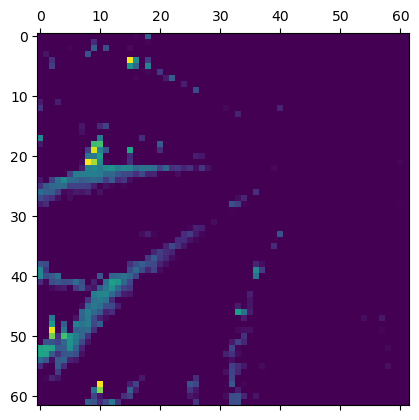

In [20]:
# Returns an array for each activation layer
activations = activation_model.predict(train_images)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

# We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

## channel 30 of first activation layer

47/47 [==============================] - 3s 53ms/step
(1500, 62, 62, 32)


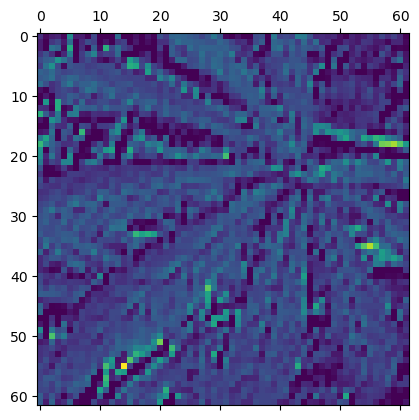

In [21]:
# Repeating the process for another channel (the 30th)
activations = activation_model.predict(train_images)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.show()

## view channel i of first activation layer

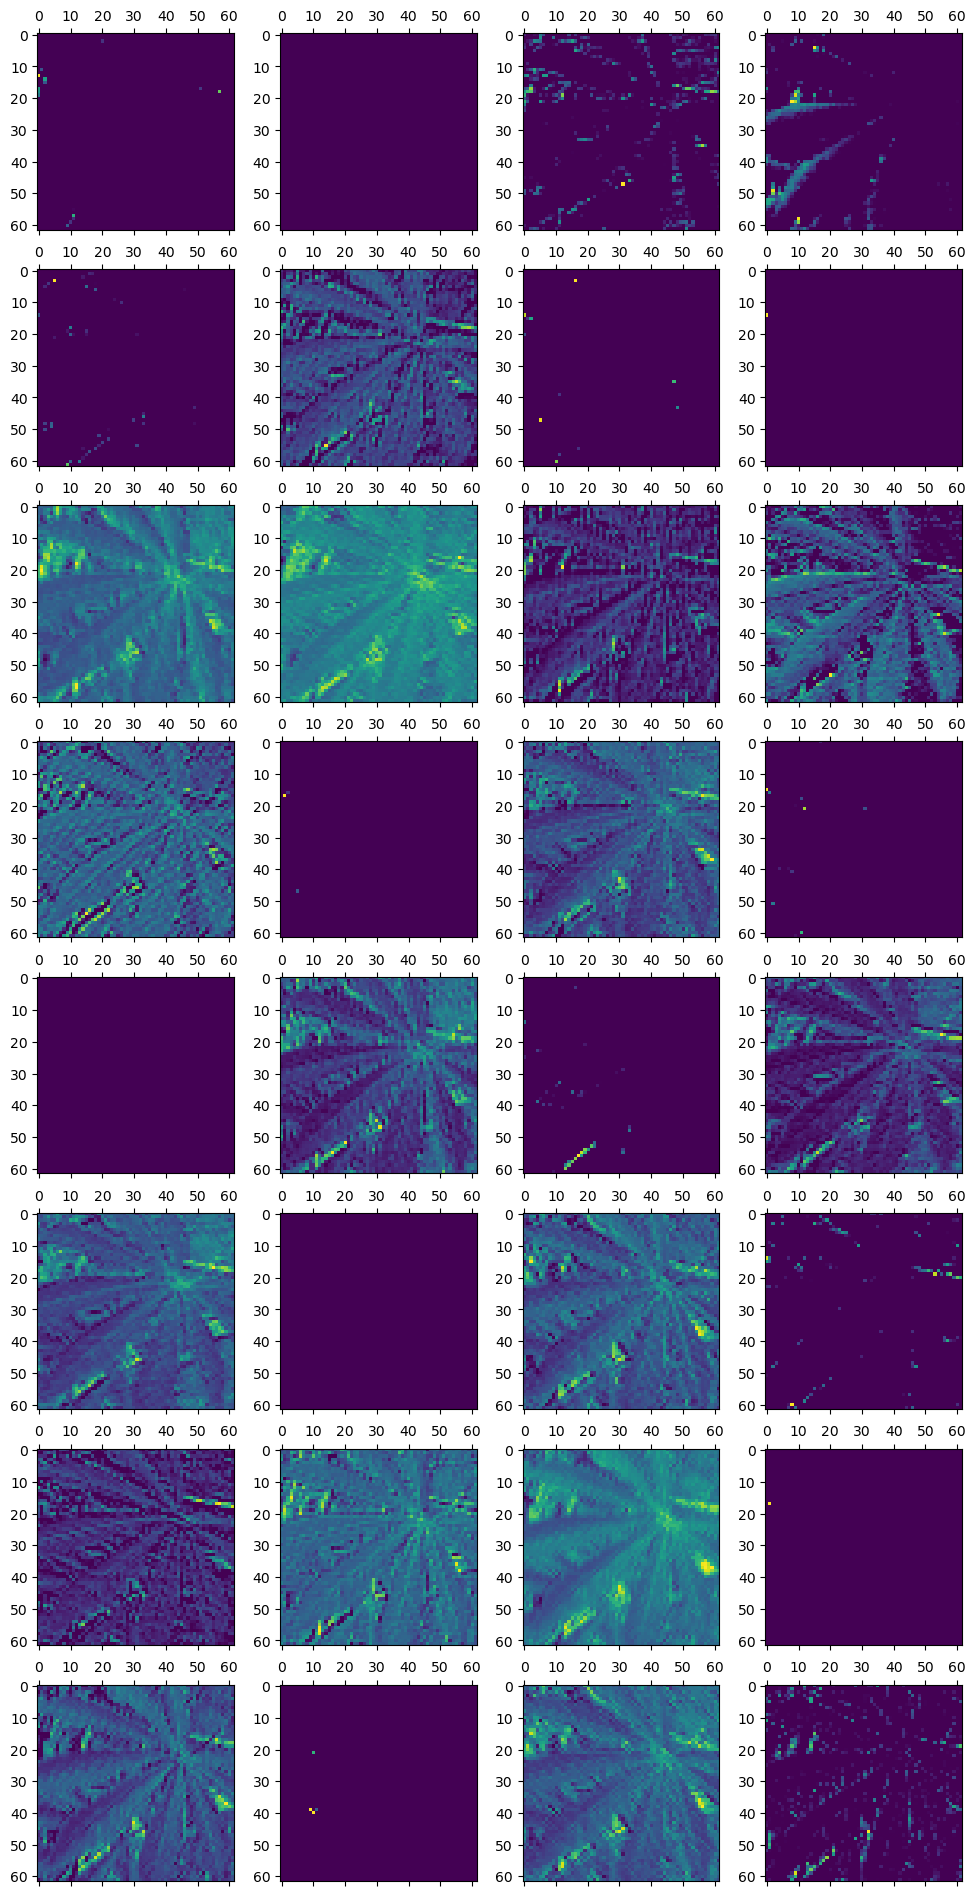

In [22]:
fig, axes = plt.subplots(8, 4, figsize=(12,24))
for i in range(32):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

### View channel 29 for all activation layers

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

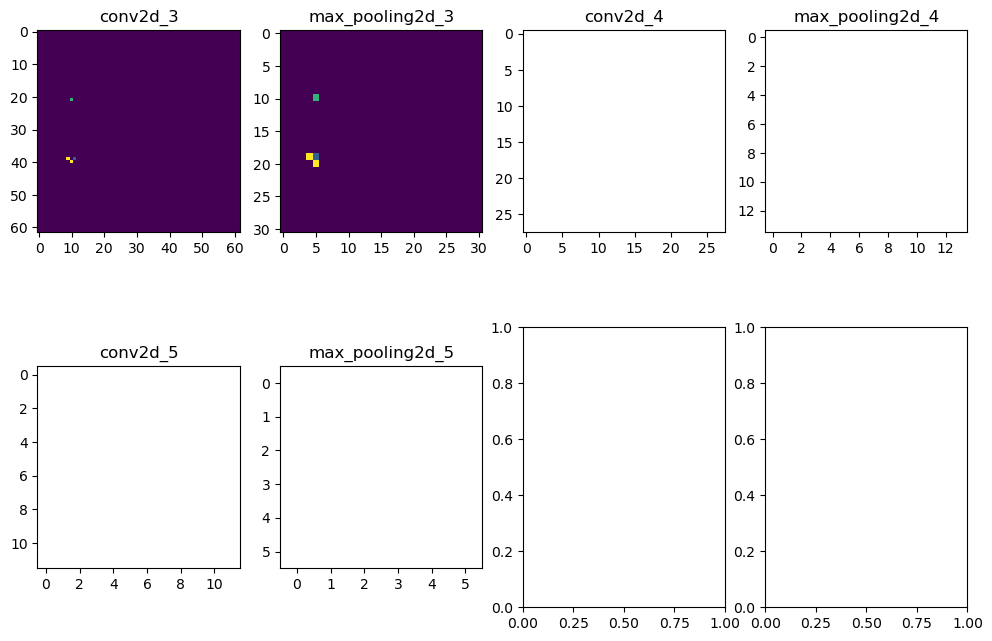

In [43]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in binary_cnn_model.layers[:8]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0,:, :, 29], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

### visualize activation layers  lab - plot feature maps for each channel of all the layers

47/47 [==============================] - 1s 23ms/step


C:\Users\lalyn\AppData\Local\Temp\ipykernel_8340\1449437876.py:37: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
C:\Users\lalyn\AppData\Local\Temp\ipykernel_8340\1449437876.py:37: RuntimeWarning: divide by zero encountered in divide
  channel_image /= channel_image.std()


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

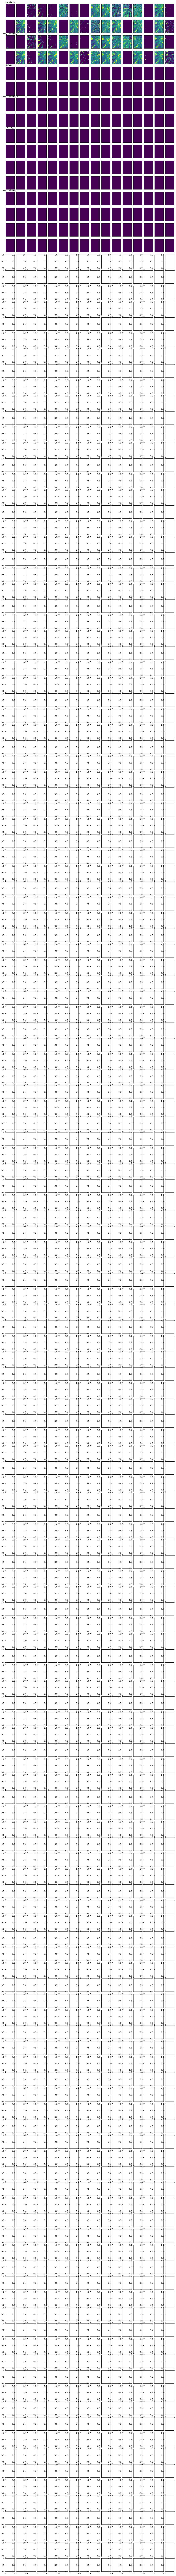

In [35]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in binary_cnn_model.layers[:8]]

# Create a model for displaying the feature maps
activation_model = models.Model(inputs=binary_cnn_model.input, outputs=layer_outputs)

activations = activation_model.predict(train_images)

# Extract Layer Names for Labelling
layer_names = []
for layer in binary_cnn_model.layers[:8]:
    layer_names.append(layer.name)

total_features = sum([a.shape[-1] for a in activations])
total_features

n_cols = 16
n_rows = math.ceil(total_features / n_cols)


iteration = 0
fig , axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows*1.5))

for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    for ch_idx in range(n_channels):
        row = iteration // n_cols
        column = iteration % n_cols
    
        ax = axes[row, column]

        channel_image = layer_activation[0,
                                         :, :,
                                         ch_idx]
        # Post-process the feature to make it visually palatable
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std() 
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')

        ax.imshow(channel_image, aspect='auto', cmap='viridis')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
        if ch_idx == 0:
            ax.set_title(layer_names[layer_n], fontsize=10)
        iteration += 1

fig.subplots_adjust(hspace=1.25)
plt.savefig('Intermediate_Activations_Visualized.pdf')
plt.show()

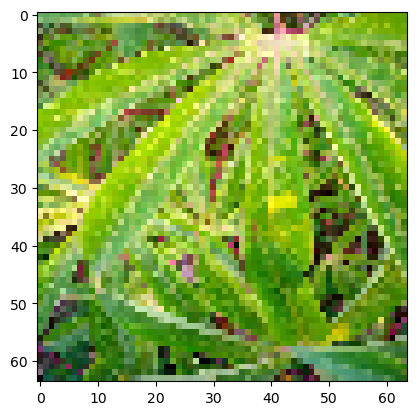

In [21]:
plt.imshow(train_images[6].astype('uint8'))
plt.show()